In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

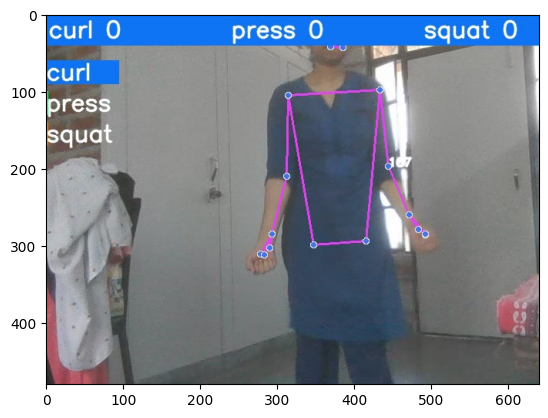

In [15]:
img= cv2.imread('exercise56.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [16]:
num_down = 2
num_bilateral = 7

In [17]:
img_color = np.copy(img)

In [18]:
for _ in range(num_down):
    img_color = cv2.pyrDown(img_color)

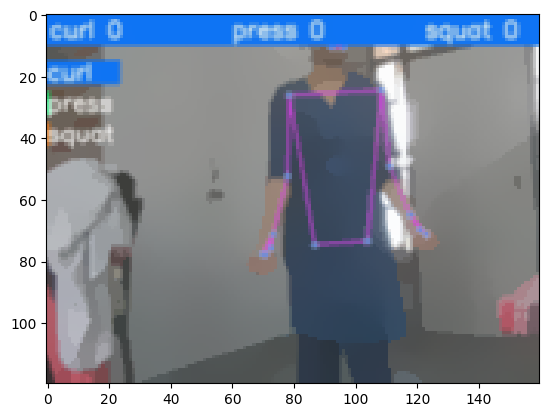

In [19]:
for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(img_color, d=9,
                                    sigmaColor=8,
                                    sigmaSpace=7)
plt.imshow(img_color)

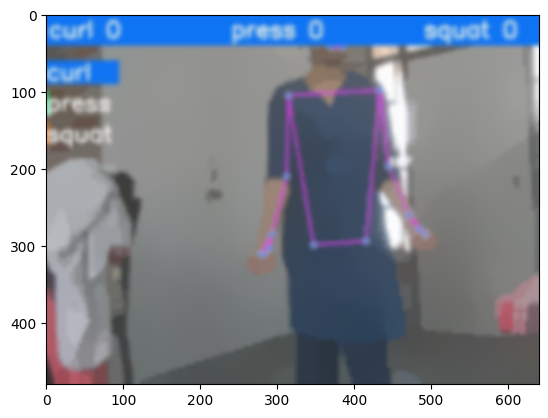

In [20]:
for _ in range(num_down):
    img_color = cv2.pyrUp(img_color)
plt.imshow(img_color)

In [21]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)

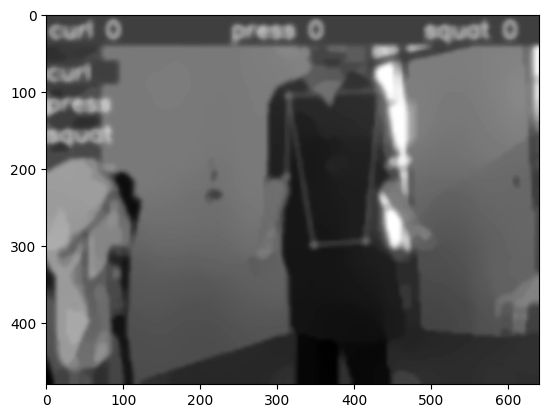

In [22]:
plt.imshow(img_blur, cmap='gray')

In [23]:
img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=2)

In [24]:
img_mask = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_animated = cv2.bitwise_and(img_color, img_mask)

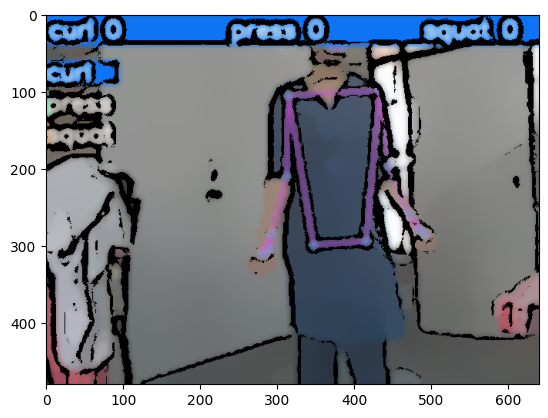

In [25]:
plt.imshow(img_animated)

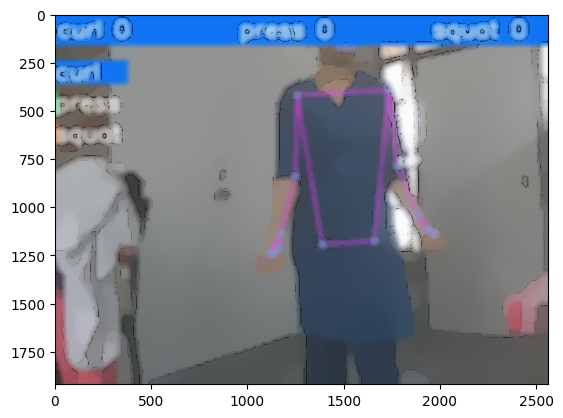

In [26]:
for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(img_color, d=9,
                                    sigmaColor=8,
                                    sigmaSpace=7)
                                 
for _ in range(num_down):
    img_color = cv2.pyrUp(img_color)

img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)

img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=2)

img_mask = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_animated = cv2.bitwise_and(img_color, img_mask)
plt.imshow(img_animated)